# Q. 2) Salary_hike -> Build a prediction model for Salary_hike
 

In [1]:
#import dataset
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Read the data
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df['YearsExperience'].unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [5]:
df['Salary'].unique()

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [6]:
# information about my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience'>

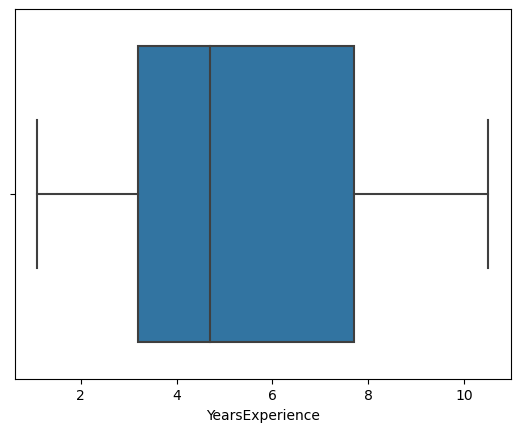

In [7]:
# Outlier checking
sns.boxplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary'>

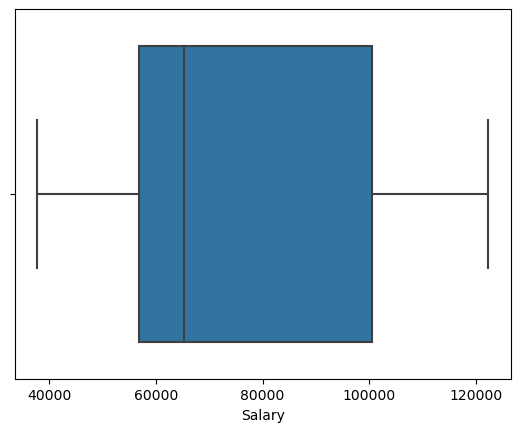

In [8]:
sns.boxplot(df['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

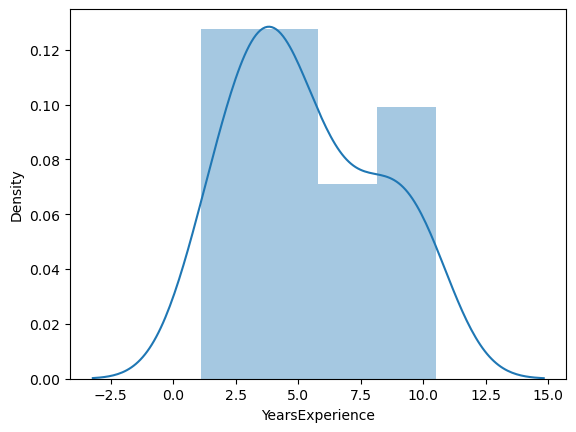

In [9]:
#distribution of data
sns.distplot(df["YearsExperience"])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

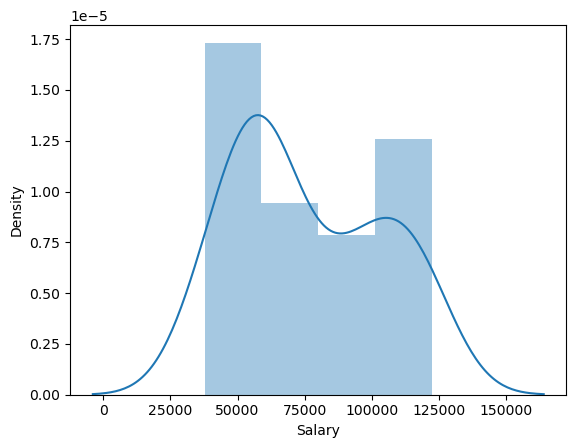

In [10]:
sns.distplot(df["Salary"])

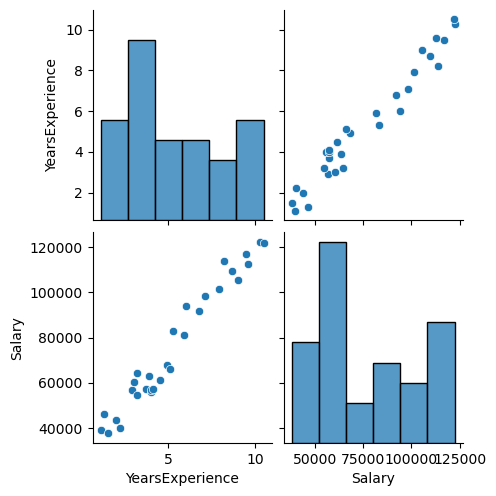

In [11]:
sns.pairplot(df)

In [12]:
#Correlation
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

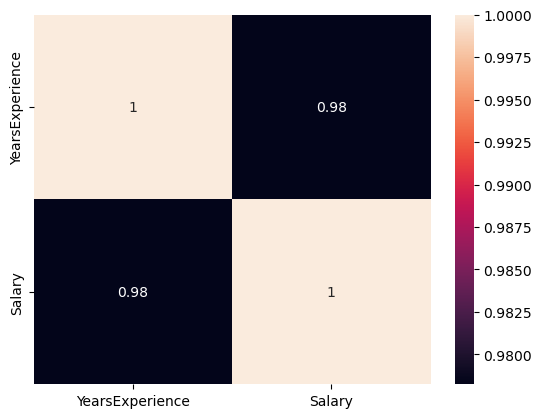

In [13]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

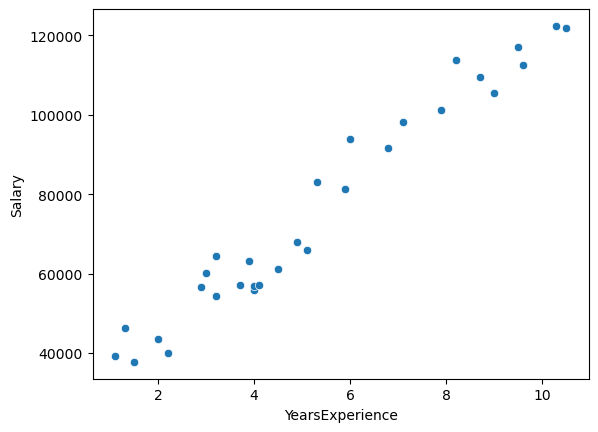

In [14]:
sns.scatterplot(df["YearsExperience"],df["Salary"])

# Model Building

In [15]:
# import library for simple linear regression
import statsmodels.formula.api as smf


In [16]:
# fit the model
model = smf.ols("Salary~YearsExperience",data=df,).fit()

In [17]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

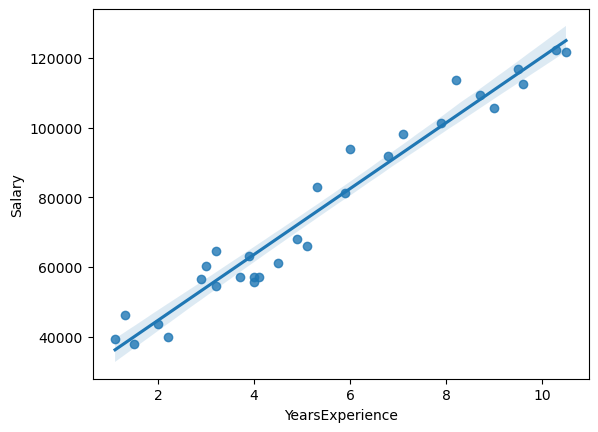

In [18]:
sns.regplot(df['YearsExperience'],df['Salary'],data=df)

In [19]:
# The p and t values
print(model.pvalues, '\n',model.tvalues)

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64 
 Intercept          11.346940
YearsExperience    24.950094
dtype: float64


In [20]:
# accuracy of the data
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [21]:
# Using Log

In [22]:
model1 = smf.ols("np.log(Salary)~np.log(YearsExperience)",data=df,).fit()

In [23]:
model1.params

Intercept                  10.328043
np.log(YearsExperience)     0.562089
dtype: float64

In [24]:
print(model1.tvalues,'\n',model1.pvalues)

Intercept                  184.867959
np.log(YearsExperience)     16.352542
dtype: float64 
 Intercept                  9.073132e-45
np.log(YearsExperience)    7.395278e-16
dtype: float64


In [25]:
model1.rsquared,model1.rsquared_adj

(0.9052150725817149, 0.9018298966024904)

In [26]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           7.40e-16
Time:                        18:44:55   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Using Square

In [28]:
model2 = smf.ols("Salary~np.square(YearsExperience)",data=df,).fit()

In [29]:
model2.params

Intercept                     48042.585515
np.square(YearsExperience)      776.318773
dtype: float64

In [30]:
print(model2.tvalues,'\n',model2.pvalues)

Intercept                     21.973654
np.square(YearsExperience)    17.397015
dtype: float64 
 Intercept                     3.389190e-19
np.square(YearsExperience)    1.518127e-16
dtype: float64


In [31]:
model2.rsquared,model2.rsquared_adj

(0.9153198857852565, 0.9122955959918728)

In [32]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           1.52e-16
Time:                        18:44:55   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(YearsExperience)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Using Square Root

In [34]:
model3 = smf.ols("Salary~np.sqrt(YearsExperience)",data=df,).fit()

In [35]:
model3.params

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64

In [36]:
model3.rsquared,model3.rsquared_adj

(0.9310009544993526, 0.9285367028743294)

In [37]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           8.57e-18
Time:                        18:44:56   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# prediction of new data

In [38]:
data=pd.Series([5,7,10])

In [39]:
newdata=pd.DataFrame(data,columns=["YearsExperience"])

In [40]:
# prediction of new data
model.predict(newdata)

0     73042.011806
1     91941.936449
2    120291.823413
dtype: float64

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        18:44:56   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""